# Studi Kasus LVQ (Explainable Neural Network)

Perusahaan tempat anda bekerja sedang berusaha mengembangkan sebuah sistem classifier dengan performa tinggi. Dari hasil pengujian banyak metode yang memiliki performa tinggi, namun metode tersebut sulit untuk dijelaskan secara spesifik sehingga memunculkan masalah etik ketika ingin diimplementasikan. Oleh karena itu anda memiliki ide untuk menggunakan LVQ karena modelnya yang dapat dijelaskan dengan mudah.

# Data Loading & Inspection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['species'] = iris.target

df['species'] = df['species'].map({i: name for i, name in enumerate(iris.target_names)})

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


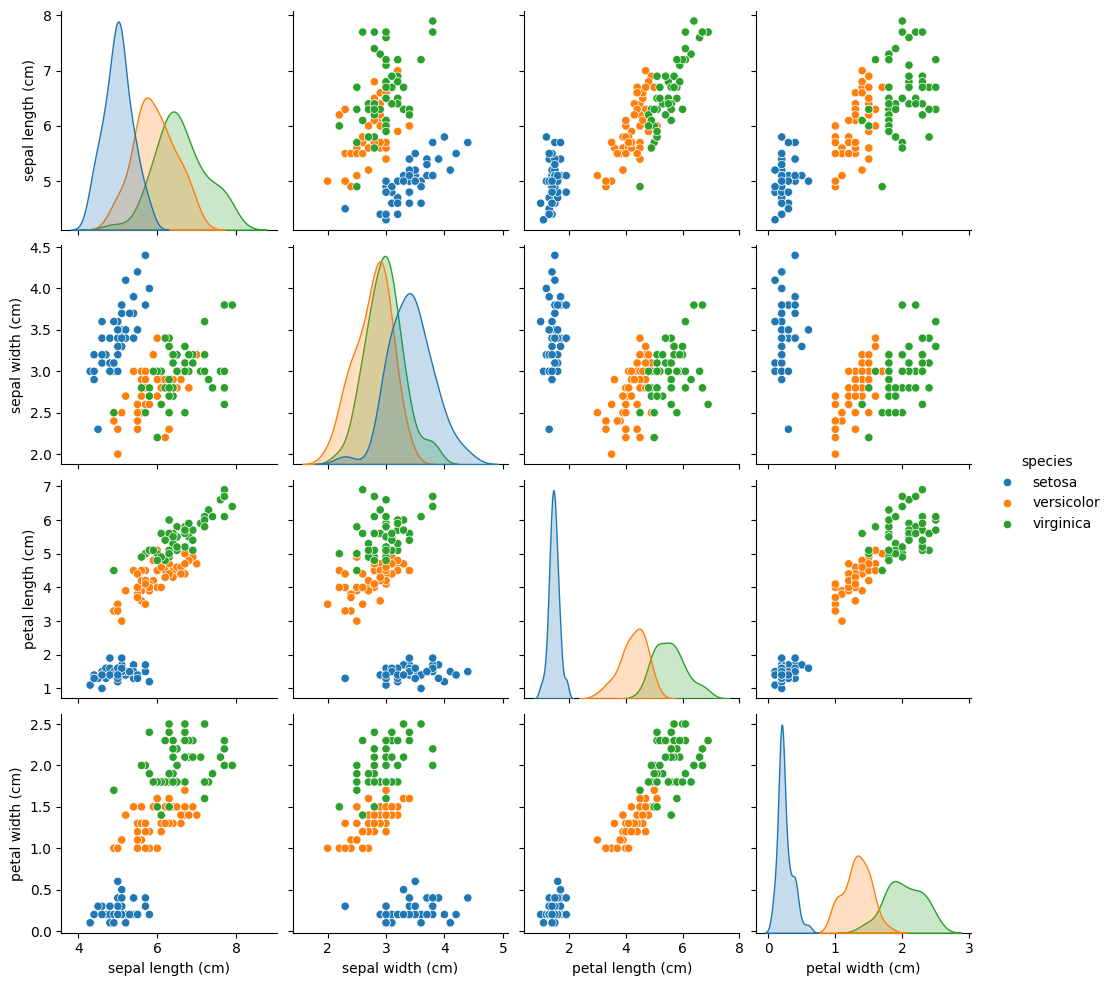

In [4]:
sns.pairplot(df, hue='species')

# Implementasi LVQ

Dari data diatas, buatlah sebuah model LVQ untuk melakukan klasifikasi. Simpan prototype (Output neuron) dari model agar kemudian dapat dianalisis

In [5]:
import numpy as np

def lvq_fit(train, target, lrate, b, max_epoch):
    label, train_idx = np.unique(target, return_index=True)
    weight = train[train_idx].astype(np.float64)

    # Filter train dan target tanpa elemen yang ada di train_idx
    train_filtered = np.delete(train, train_idx, axis=0)
    target_filtered = np.delete(target, train_idx, axis=0)

    epoch = 0

    while epoch < max_epoch:
        for i, x in enumerate(train_filtered):
            distance = [sum((x - w) ** 2) for w in weight]
            min = np.argmin(distance)
            sign = 1 if target_filtered[i] == label[min] else -1
            weight[min] += sign * lrate * (x - weight[min])

            lrate *= b
        epoch += 1

    return weight, label

In [6]:
def lvq_predict(X, model):
  center, label = model
  Y = []

  for x in X:
    d = [sum((c - x) ** 2) for c in center]
    Y.append(label[np.argmin(d)])

  return Y

In [7]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]

  return sum(s) / len(a)

In [10]:
X = df.drop('species', axis=1).to_numpy()
y = df['species'].to_numpy()

In [24]:
# Implementasi LVQ untuk data diatas

from random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = lvq_fit(X_train, y_train, lrate=0.5, b=0.8, max_epoch=50)
prototype, labels = model
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)

colors = 'rgbcmyk'

print('Accuracy:', accuracy)


Accuracy: 1.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='species')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seabo

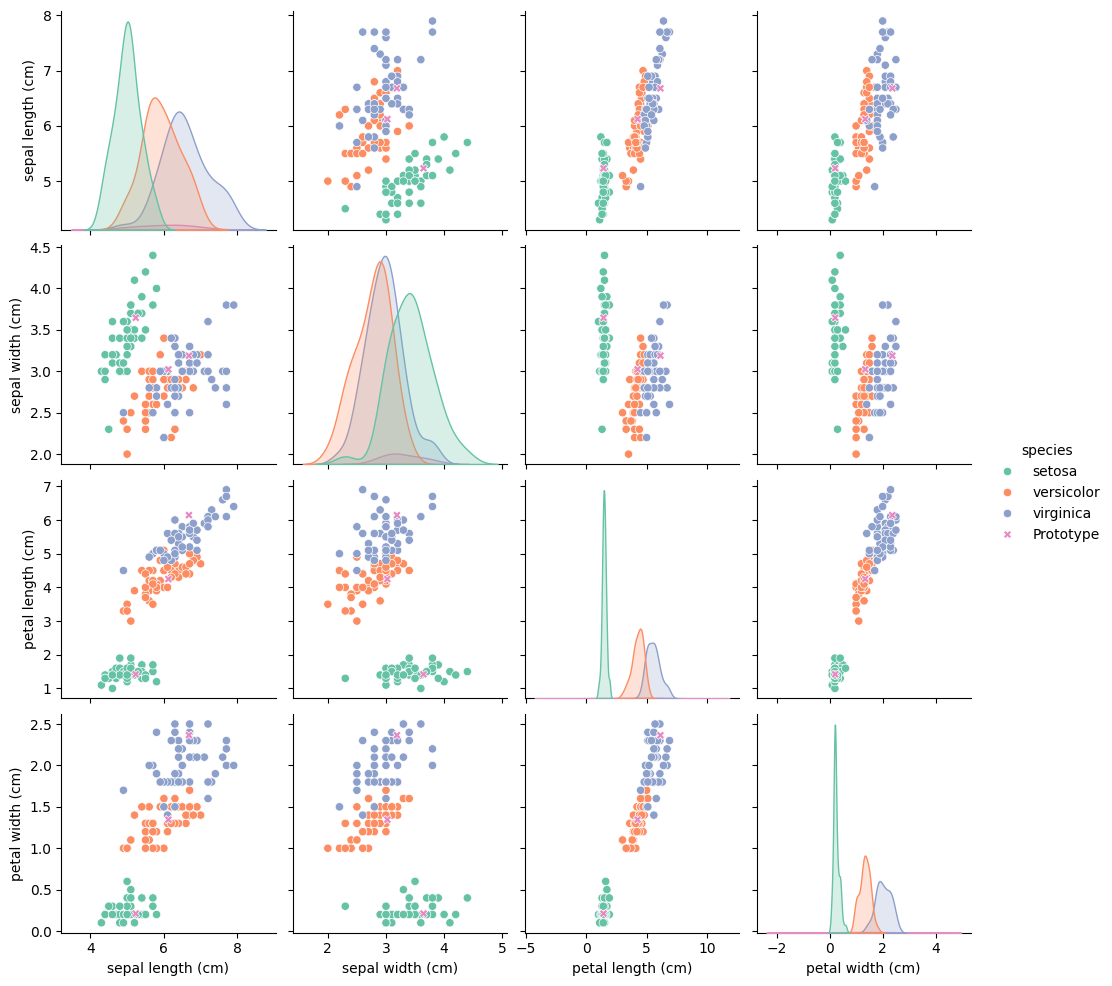

In [23]:
prototypes = pd.DataFrame(prototype, columns=iris.feature_names)
prototypes['species'] = labels

combined = pd.concat([df, prototypes], ignore_index=True)

combined['species'] = combined['species'].astype(str)
combined.loc[df.shape[0]:, 'species'] = 'Prototype'

sns.pairplot(combined, hue='species', palette=sns.color_palette("Set2"), markers={'setosa': 'o', 'versicolor': 'o', 'virginica': 'o', 'Prototype': 'X'})

plt.show()

## Analisis

1. Algoritma LVQ sudah mampu mengklasifikasi data. Akurasi dimana model mampu mencapai akurasi sebesar 1

2. no.2
*   Karakteristik untuk cluster setosa adalah Setosa memiliki sepal yang  lebar tetapi pendek, lalu Setosa juga memiliki petal yang berukuran kecil

*   karakteristik Versicolor adalah Setosa memiliki petal yang lebih besar dari setosa tetapi tidak sebesar virginica. lalu Setosa juga memiliki sepal yang cenderung kecil tetapi sedikit panjang.

*   karakteristik Virginica adalah Setosa memiliki kelopak bunga sepal yang cenderung kecil tetapi panjang, lalu Setosa juga memiliki petal yang cenderung lebar dan paling panjang dibandingkan spesies lainnya.


3. Explainable AI adalah salah satu cabang AI berfokus pada menciptakan sistem AI yang dapat memberikan penjelasan, dapat dimengerti tentang bagaimana dan mengapa mereka menghasilkan suatu output atau keputusan tertentu dari hasil perhitungan model mereka. Hal ini tentu penting untuk meningkatkan kepercayaan pengguna terhadap AI.